In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import spekpy as sp
import os
import pandas as pd
# from datetime import date, time, datetime
from scipy.interpolate import interp1d
import time
# import datetime
from nptdms import TdmsFile
from uncertainties import unumpy as unp
from uncertainties import ufloat

from numpy import array, unique, log
from scipy.optimize import curve_fit
from uncertainties.unumpy import nominal_values, std_devs
# from matplotlib.dates import date2num
# from copy import deepcopy
from os.path import join as pathjoin
import datetime

import warnings
warnings.filterwarnings("error")
from PIL import Image

In [ ]:
plt.rcParams.update({'font.size': 14})

In [9]:
from importlib import reload
import ic_testing_functions as icf
from ic_testing_functions import nom, err, powerlaw, extendedpowerlaw

In [176]:
reload(icf)
run_array = []

folderpath = r"..\DataFiles\Pre-Xray tests"
# folderpath = r"DataFiles\Proper Xray runs"
for foldname in os.listdir(folderpath):
    run = icf.ic_run.load_from_folder(os.path.join(folderpath, foldname))
    run_array.append(run)

Analysed Data at 300um_3swait_5thresh_long time
Analysed Data at FIRST_300um_v2
Analysed Data at FIRST_300um_v3_3swait
Analysed Data at higher_noise_overnight
Analysed Data at higher_noise_overnight_EDITED
Analysed Data at lower_noise_latest


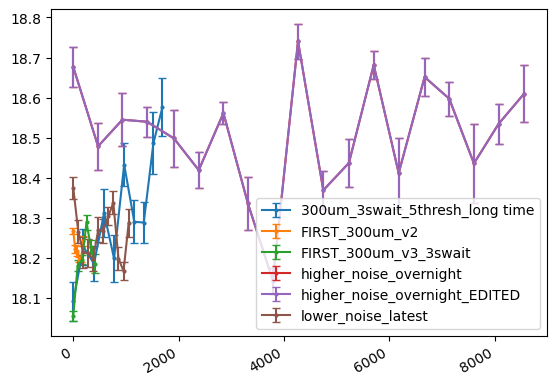

In [177]:
# fig,axs = plt.subplots(1,2)
plt.figure()
for test in run_array:
    # axs[0].plot(test.AbsTime, nom(test.power.ic))
    # axs[1].plot(test.AbsTime, nom(test.extended.ic))
    plt.errorbar(test.times, nom(test.extended.ic), yerr = err(test.extended.ic), label = test.id, fmt = 'o-',markersize = 2,capsize=3,)
    plt.gcf().autofmt_xdate()
plt.legend()
# plt.tight_layout()
# plt.ylim([18,19])

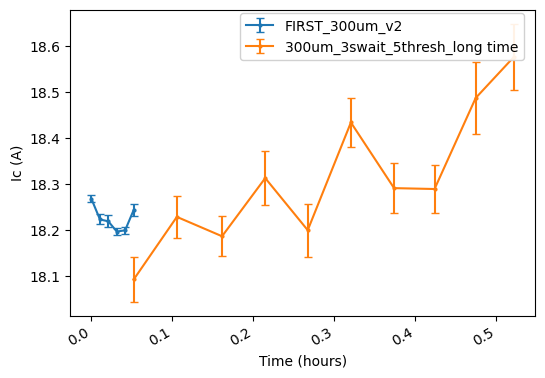

In [178]:
comb = run_array[1]+run_array[0]
comb.defaultplot()

In [601]:
reload(icf)
xray_run_array = []

folderpath = r"..\DataFiles\Proper Xray runs"
for foldname in os.listdir(folderpath):
    run = icf.xray_ic_run.load_from_folder(os.path.join(folderpath,foldname))
    run.load_dosages()
    xray_run_array.append(run)

Fitting Ic curves in ..\DataFiles\Proper Xray runs\xray_FIRSTRUN: 100%|██████████| 22/22 [00:00<00:00, 45.46it/s]


Analysed Data at xray_FIRSTRUN


Fitting Ic curves in ..\DataFiles\Proper Xray runs\xray_secondrun_1902: 100%|██████████| 127/127 [00:04<00:00, 26.85it/s]


Analysed Data at xray_secondrun_1902


Fitting Ic curves in ..\DataFiles\Proper Xray runs\xray_thirdrun_morning_2102: 100%|██████████| 206/206 [00:08<00:00, 25.61it/s]

Analysed Data at xray_thirdrun_morning_2102


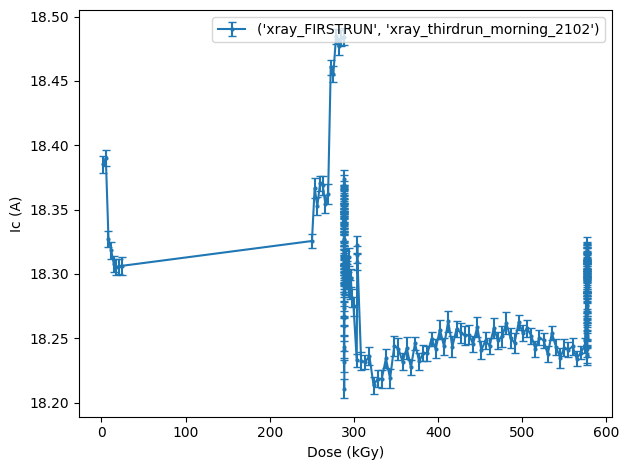

In [238]:
comb = (xray_run_array[0]+xray_run_array[2])
comb.plotvdose()

In [595]:
reload(icf)

_ = icf.dosage_from_tdms(actions = ["constant"], timings = [("2025-02-04 11:53:57","2025-02-04 16:31:57")], fname = r"..\DataFiles\Proper Xray runs\xray_FIRSTRUN")

_ = icf.dosage_from_tdms(actions = [], timings = [], fname = r"..\DataFiles\Proper Xray runs\xray_secondrun_1902")

_ = icf.dosage_from_tdms(actions = ["monthly seasoning", "constant"], timings = [("2025-02-21 13:57:00",),("2025-02-21 15:03:57","2025-02-21 18:16:57")], fname = r"..\DataFiles\Proper Xray runs\xray_thirdrun_morning_2102")

In [603]:
xray_run_array[0].add_crittimes([("2025-02-04 11:53:57","2025-02-04 16:31:57")], mode = 'absolute')
xray_run_array[0].setid('Set A')
xray_run_array[1].setid('Set C')
xray_run_array[1].add_crittimes([])
xray_run_array[2].add_crittimes([("2025-02-21 13:57:00","2025-02-21 14:51:00"),("2025-02-21 15:03:57","2025-02-21 18:16:57")], mode = 'absolute')
xray_run_array[2].setid('Set B')

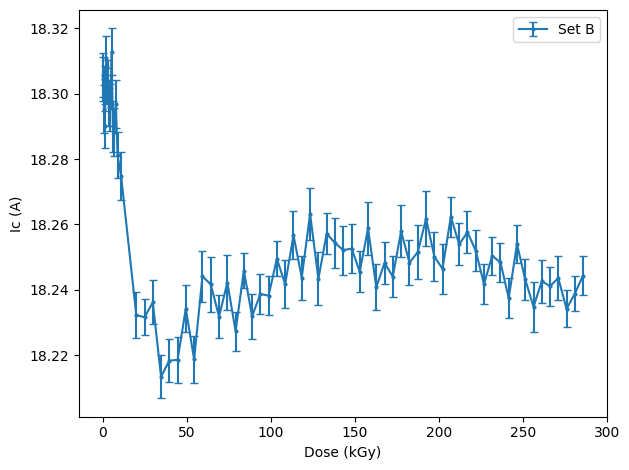

In [606]:
xray_run_array[2].plotvdose()

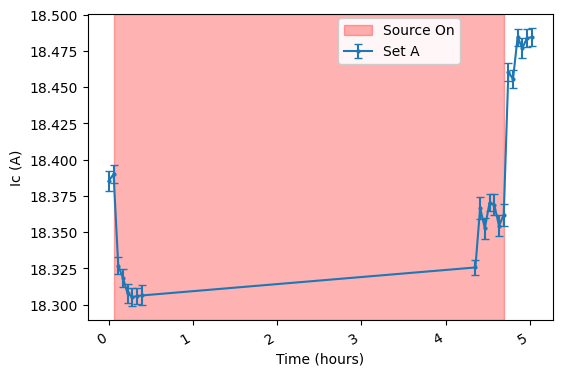

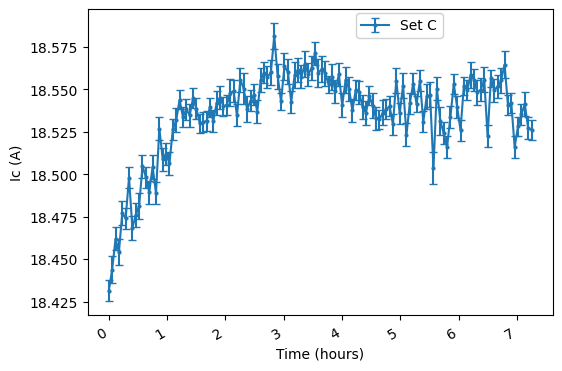

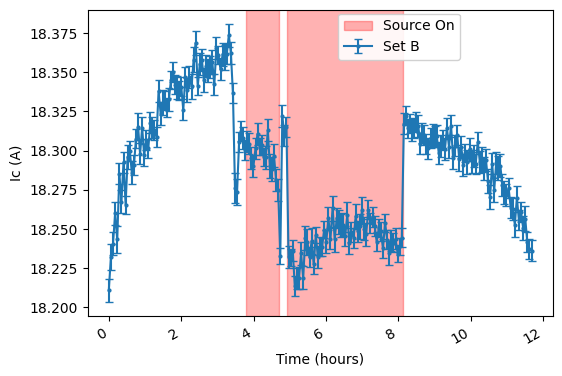

In [288]:
for run in xray_run_array:
    run.defaultplot(plot_type='power')
    pass

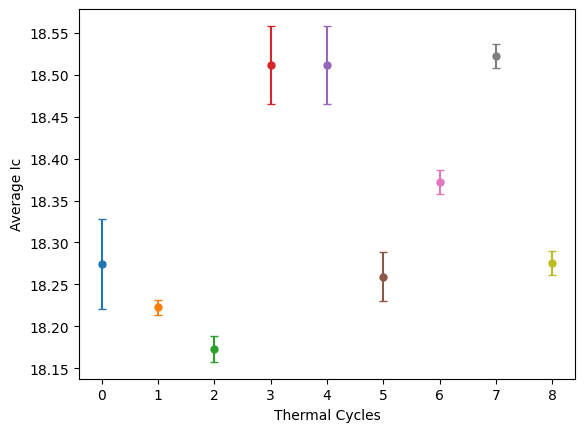

In [189]:
reload(icf)
combined_array = np.concat([run_array, xray_run_array])
plt.figure()
t0 = 0

for i,run in enumerate(combined_array):
    kept_ind = ~np.isnan(nom(run.extended.ic))
    plottime = run.times[kept_ind]
    plotic = run.extended.ic[kept_ind]

    times = plottime + t0 
    t0 += run.times[-1]
    # plt.errorbar(times, nom(plotic),yerr = err(plotic),label = run.id, fmt = 'o-',markersize = 2,capsize=3,)
    ave_ic = np.nanmean(nom(run.extended.ic))
    # print(ave_ic)
    ave_ic = icf.get_uncertain_mean2(run.extended.ic)
    plt.errorbar(i, nom(ave_ic),yerr = err(ave_ic),label = run.id, fmt = 'o-',markersize = 5,capsize=3,)

plt.xlabel("Thermal Cycles")
plt.ylabel("Average Ic")
# plt.legend()
# plt.tight_layout()
folderpath = r"C:\Users\rohan\OneDrive - Victoria University of Wellington - STAFF\Documents\Latex Documents\Paper\paper_images"
# plt.savefig(pathjoin(folderpath, "Average_Ic_thermcycles"), dpi = 1200,bbox_inches='tight')

ValueError: not enough values to unpack (expected 2, got 1)

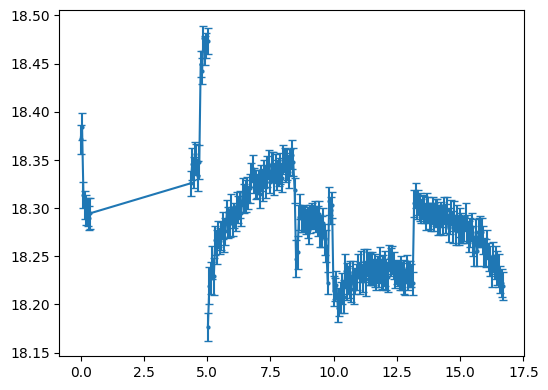

In [207]:
comb = xray_run_array[0]+xray_run_array[2]
comb.defaultplot()
comb.crittimes

In [208]:
xray_run_array[2].load_raw_data()

(time,ic) = (3.1438888888888887,18.36153)
(time,ic) = (5.138333277777778,18.21346)


Text(0, 0.5, 'Electric Field (uV/cm)')

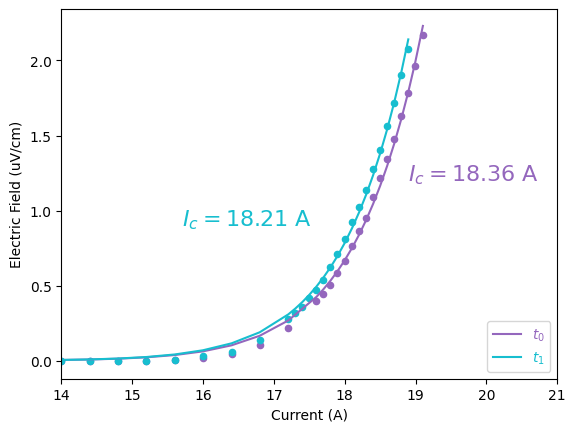

In [211]:
fig,ax = plt.subplots()
testing = xray_run_array[2]

indA = 55
indB = 90

ann = [(18,1), (18,2)]
ann_loc = [(18.9,1.2),(15.7,.9) ]

exptimes = testing.times[[indA, indB]]/3600
colseq = icf.get_colourlist(10)[6]
colseq = ['tab:purple', 'tab:cyan']
for j,ind in enumerate([indA, indB]):
    curr = testing.raw_current[ind]
    volt = testing.raw_voltage[ind]
    ptype = 1

    if ptype: 
        params=testing.power
        n =params.n[ind].nominal_value
        ic = params.ic[ind].nominal_value
        model = powerlaw(curr, n, ic)
    else: 
        params=testing.extended
        n =params.n[ind].nominal_value
        ic = params.ic[ind].nominal_value
        R = params.R[ind].nominal_value
        V0 = params.V0[ind].nominal_value
        model = extendedpowerlaw(curr, n, ic, R, V0)
    print(f"(time,ic) = ({exptimes[j]},{ic:.5f})")
    tstamp = "0"+(str(datetime.timedelta(hours=exptimes[j]))[:4])
    # print(tstamp)
    ax.plot(curr, model, color = colseq[j], label = f"$t_{j}$")
    ax.scatter(curr, volt, s =20, color = colseq[j])

    ax.annotate(f"$I_c = {ic:.2f}$ A", xy =ann[j],
                xytext =ann_loc[j],
                zorder = ax.get_zorder(), 
                color = colseq[j], fontsize = 16)

testlab = f"$I_c$ = {ic:.2f} A" 
ax.legend(loc = 'lower right', labelcolor='linecolor')
ax.set_xlim([14,21])
ax.set_xlabel('Current (A)')
ax.set_ylabel('Electric Field (uV/cm)')
# ax.set_tight_layout()
# img = np.asarray(Image.open('inset_testing.png'))
# inset_ax = ax.inset_axes(bounds = [0.005, .42, .6, .6])
# inset_ax.imshow(img)
# inset_ax.axis('off')
# inset_ax.plot(inset_fig.axes[0])

# plt.savefig(pathjoin(folderpath, "Sample_ic_runs_t0t1"), dpi = 1200,bbox_inches='tight')



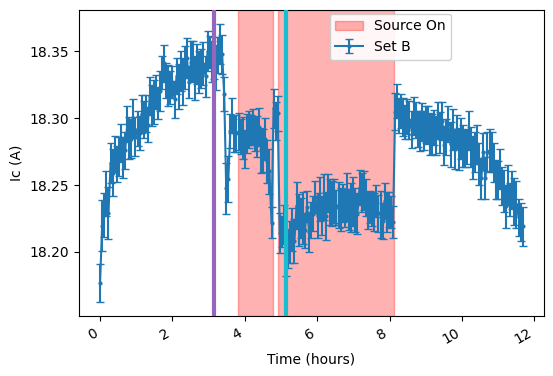

In [212]:
testing.defaultplot()


xmin, xmax, ymin, ymax = plt.axis()
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

plt.vlines(exptimes, ymin = ymin, ymax = ymax, colors= colseq, linewidth = 3, zorder = 20)
# plt.legend().remove()
# plt.axis('off')
inset_fig = plt.gcf()
# inset_fig.set_size_inches([2,1])
# inset_fig.tight_layout(False)

# plt.savefig("inset_testing", dpi = 1200,bbox_inches='tight')


In [30]:
## Buffer time to add on for annotations
xray_run_array[0].RelTime[-1]/3600

np.float64(5.030342444444445)

In [60]:
imname = r"C:\Users\rohan\OneDrive - Victoria University of Wellington - STAFF\Documents\Latex Documents\Paper\paper_images\top view.PNG"
img = np.asarray(Image.open(imname))

(np.float64(-200.5), np.float64(1781.5), np.float64(1089.5), np.float64(-200.5))
790.5 444.5


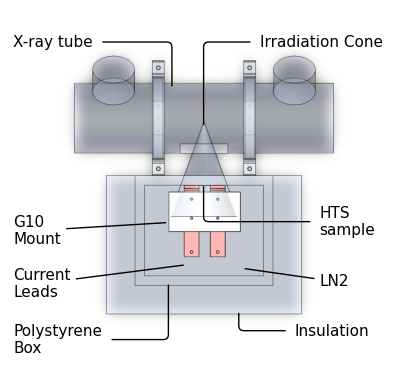

In [ ]:
imfig, imax = plt.subplots()
imax.imshow(img)
imax.axis('on')

yoff = 200
xoff = 200
imax.set_ylim(889.5+yoff,-.5-yoff)
imax.set_xlim(-0.5-xoff, 1581.5+xoff)

xmin, xmax, ymin, ymax = imax.axis()
xmiddle = (xmax+xmin)/2
ymiddle = (ymax+ymin)/2
print(imax.axis())
print(xmiddle,ymiddle)
imax.grid()

# imax.axis('off')
bbox = dict(boxstyle ="round", fc ="0.9")
roundarrow = dict(
    arrowstyle = "-",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 5", color = 'black', shrinkA = 5)
straightarrow = dict(color = 'black',arrowstyle = "-",)
bbox = None
fsize = 11
imax.annotate(f'X-ray tube', xy =(xmiddle-90,170), xytext =(250,50), arrowprops = roundarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'Polystyrene\nBox', xy =(xmiddle-100,720), xytext =(250,920),arrowprops = roundarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'Insulation', xy =(xmiddle+100,800), xytext =(1050,870),arrowprops = roundarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'HTS\nsample', xy =(xmiddle,440), xytext =(1120,585),arrowprops = roundarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'Irradiation Cone', xy =(xmiddle,280), xytext =(950,50), arrowprops = roundarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'LN2', xy =(xmiddle+110,680), xytext =(1120,730),arrowprops = straightarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'G10\nMount', xy =(xmiddle-100,550), xytext =(250,610),arrowprops = straightarrow, fontsize = fsize, bbox = bbox)
imax.annotate(f'Current\nLeads', xy =(xmiddle-50,670), xytext =(250,760),arrowprops = straightarrow, fontsize = fsize, bbox = bbox)
imax.grid(None)

imax.set_xlim(xmiddle-550,xmiddle+550)
imax.set_ylim(ymiddle+550,ymiddle-500)
imax.axis('off')
plt.savefig(pathjoin(folderpath, "setup_topview_annotated_currleads"), dpi = 1200,bbox_inches='tight')

In [607]:
reload(icf)
foldname = r"..\DataFiles\retest\Xray run 01 -1031am"
newrun = icf.xray_ic_run.load_from_folder(foldname, ic_guess=6.3)
newrun.average_repeats(numrepeats=3)

Fitting Ic curves in ..\DataFiles\retest\Xray run 01 -1031am: 100%|██████████| 429/429 [00:31<00:00, 13.76it/s]

Analysed Data at Xray run 01 -1031am


In [608]:
xray_timings = [("2025-06-26 10:33:00","2025-06-26 13:08:00"), ("2025-06-26 13:37:00","2025-06-26 17:26:00"),("2025-06-26 18:00:00","2025-06-26 22:30:00")]
_ = icf.dosage_from_tdms(actions = ["constant", "constant", "constant"], 
                         timings = [("2025-06-26 10:33:00","2025-06-26 13:08:00"), ("2025-06-26 13:37:00","2025-06-26 17:26:00"),("2025-06-26 18:00:00","2025-06-26 22:30:00")], 
                         fname = r"..\DataFiles\retest\Xray run 01 -1031am", 
                         plot_bool=False)

In [609]:
newrun.load_dosages()
newrun.add_crittimes(xray_timings, mode = 'absolute')
refilling_timings = ["2025-06-26 13:18:00","2025-06-26 17:40:00",]
newrun.add_refillingtimes(refilling_timings, mode = 'absolute')

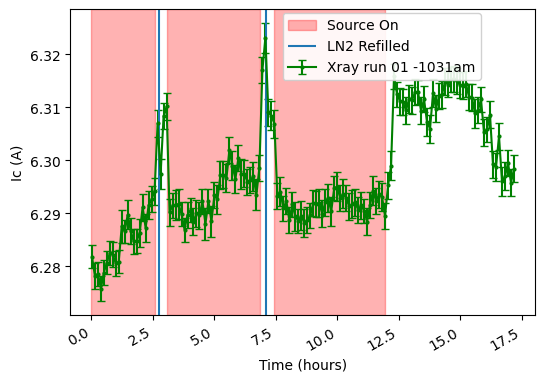

In [610]:
newrun.defaultplot()

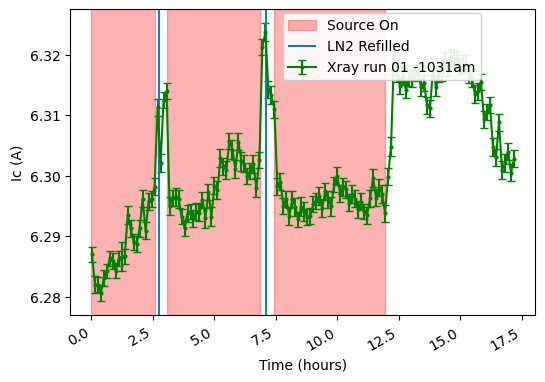

In [611]:
newrun.defaultplot(plot_type='power')

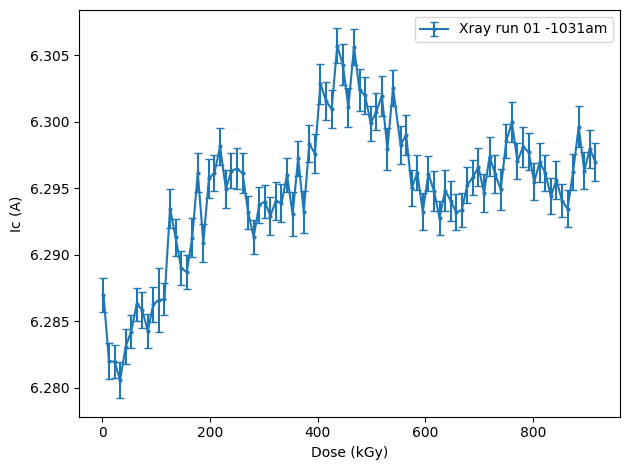

In [612]:
newrun.plotvdose("power")